In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import torch
import os
%matplotlib inline

In [ ]:
# This notebook aims to read an image from the dataset
# and drawing the ideal bounding boxes and its predicted
# while saving each step of the process

In [17]:
# Saving the original cropped image

image = mpimg.imread('../samples/s1.jpg',cv2.COLOR_BGR2RGB)
crop = image[1500:2000, 800:1300]
plt.imsave('../samples/' + 's3' + '.jpg',crop)

In [2]:
# TF109_258/  20170830_162459
# TF105_245/  20170830_140427

# Setting the patient and its image

direct = 'TF105_245/'
file = '20170830_140427'

path =   '../thick-blood-smears-150/' + direct + file +'.jpg' 
labels = '../thick-blood-smears-150/GT_updated/' + direct +file + '.txt'

lbl = open(labels,"r").readlines()

finalDirect = '../samples/'

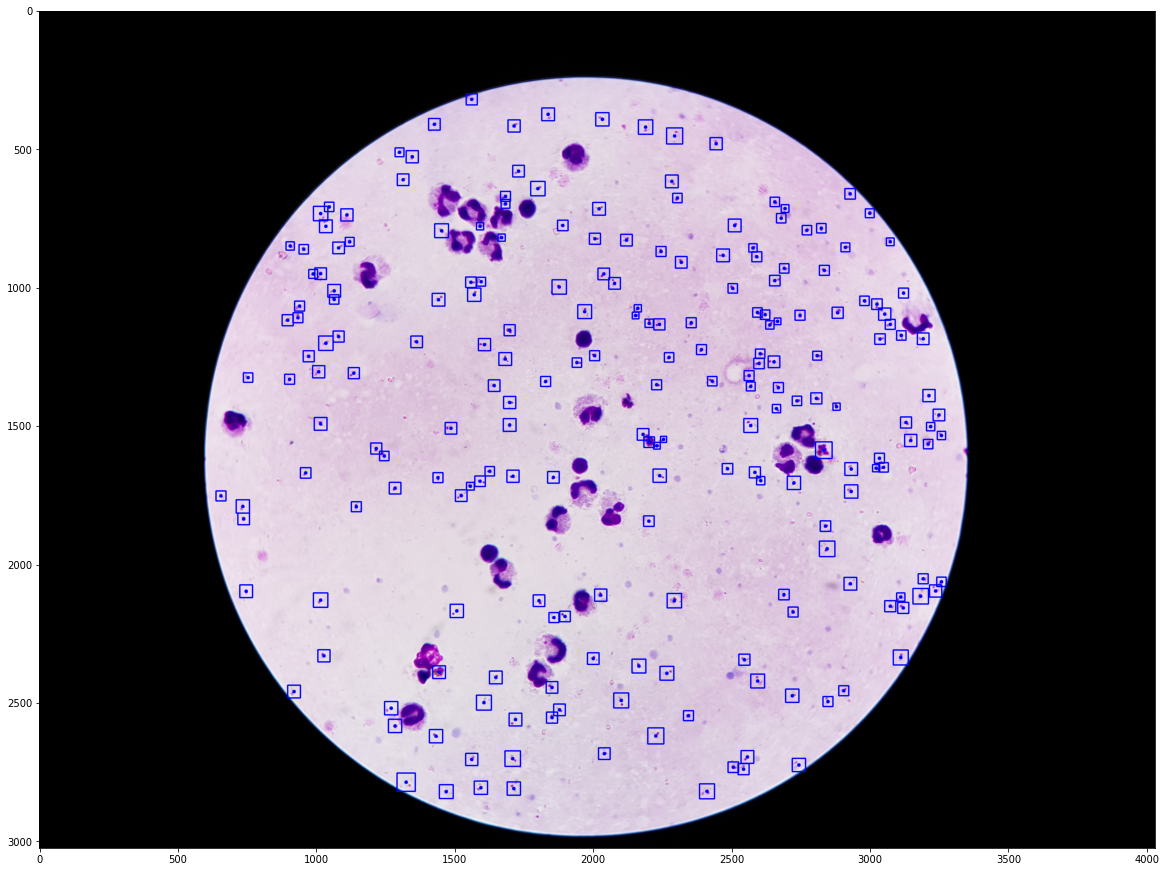

214


In [3]:
y=1500
x=800
h=500
w=500

#file = '20170728_172025'
#path = '../malaria/thick-blood-smears-150-YOLO/images/train/' + file + '.jpg'
#labels =  '../malaria/thick-blood-smears-150-YOLO/labels/train/' + file + '.txt'

image = mpimg.imread(path,cv2.COLOR_BGR2RGB)

crop = image[1500:2000, 800:1300]
plt.imsave('../samples/' + file + '_1' + '.jpg',crop)


# Getting the position of parasite's informations

coordenadas = []
count = 0
for linha in open(labels,"r").readlines():
    if "Parasite" in linha:
        i = linha.find("Circle,2,")
        x = linha[i+len("Circle,2,"):]
        x = [int(float(y)) for y in x.split(",")]
        
        raio = int(((x[0]-x[2])**2 + (x[1] -x[3])**2)**0.5)
        x = [x[0],x[1],raio]
        coordenadas.append(x)
        count = count + 1
        
# Drawing the circles

for circ in coordenadas:
    center_coordinates = (circ[0],circ[1])
    color = (0, 0, 255)
    image = cv2.circle(image, center_coordinates, 3, color, 6)

crop = image[1500:2000, 800:1300]
plt.imsave('../samples/' + file + '_2' + '.jpg',crop)


# Drawing the bounding boxes

for circ in coordenadas:
    center = (circ[0],circ[1])
    p1 = (center[0] - circ[2], center [1] - circ[2])
    p2 = (center[0] + circ[2], center [1] + circ[2])
    image = cv2.rectangle(image, p1, p2, color, 4)
    #image = cv2.circle(image, center, circ[2], color, 2)
    
plt.figure(figsize = (20,20))

# Saving the final result

crop = image[1500:2000, 800:1300]
plt.imshow(image)
plt.imsave('../samples/' + file + '_3' + '.jpg', crop)
plt.show()
print(count)